In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Carregar os dados
df = pd.read_excel('Ligas vs Atletas.xlsx', sheet_name='Analise 2')



In [9]:
# Estatísticas básicas por gênero
desc_stats = df.groupby('Gênero')[['Salário médio', 'razão salário/receita', 
                                  'razão salário/publico', 'razão salário/audiência']].describe()
print(desc_stats)

# Médias comparativas
medias_comparativas = df.groupby('Gênero')[['Salário médio', 'razão salário/receita', 
                                          'razão salário/publico', 'razão salário/audiência']].mean()
print("\nMédias Comparativas:\n", medias_comparativas)

          Salário médio                                              \
                  count       mean           std      min       25%   
Gênero                                                                
Feminino            5.0    62608.0  6.477862e+04   3500.0   22800.0   
Masculino           5.0  3146224.6  2.851236e+06  50000.0  358333.0   

                                           razão salário/receita            \
                 50%        75%        max                 count      mean   
Gênero                                                                       
Feminino     50073.0    66667.0   170000.0                   3.0  0.000279   
Masculino  3594228.0  5561896.0  6166666.0                   4.0  0.000243   

           ... razão salário/publico             razão salário/audiência  \
           ...                   75%         max                   count   
Gênero     ...                                                             
Feminino   ...           

In [19]:
# Antes de rodar o modelo, renomeie as colunas
df = df.rename(columns={
    'Salário médio': 'salario_medio',
    'média de público': 'media_publico'
})

# Agora use os novos nomes sem espaços/acentos
model = ols('salario_medio ~ Gênero + Receita + media_publico + audiência', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          salario_medio   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     7.286
Date:                Mon, 14 Jul 2025   Prob (F-statistic):              0.124
Time:                        21:19:13   Log-Likelihood:                -103.64
No. Observations:                   7   AIC:                             217.3
Df Residuals:                       2   BIC:                             217.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.809e+06   1

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


C:\Users\henriquebspc\AppData\Local\Temp\ipykernel_43328\3410333308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gênero'] = LabelEncoder().fit_transform(df['Gênero'])


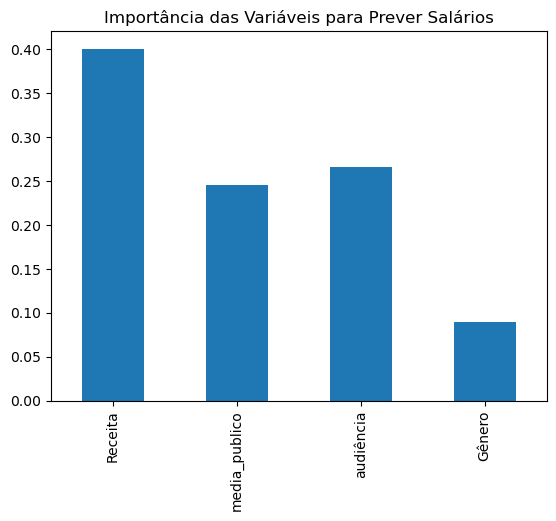

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Preparar dados
X = df[['Receita', 'media_publico', 'audiência']]
X['Gênero'] = LabelEncoder().fit_transform(df['Gênero'])
y = df['salario_medio']

# Modelo
model = RandomForestRegressor()
model.fit(X, y)

# Importância das features
pd.Series(model.feature_importances_, index=X.columns).plot.bar()
plt.title('Importância das Variáveis para Prever Salários')
plt.show()

In [35]:
# Modelo usando APENAS fatores objetivos (sem gênero)
model_objetivo = RandomForestRegressor()
model_objetivo.fit(X[['Receita', 'media_publico', 'audiência']], y)

# Previsões "justas" (se não houvesse viés)
df['salario_previsto'] = model_objetivo.predict(X[['Receita', 'media_publico', 'audiência']])

# Calcular disparidade
df['disparidade'] = df['salario_medio'] - df['salario_previsto']

# Média de disparidade por gênero
df.groupby('Gênero')['disparidade'].mean()

Gênero
Feminino    -341837.316
Masculino    220412.470
Name: disparidade, dtype: float64